In [1]:
from rembg import remove
from PIL import Image

In [4]:
input_path = 'cat_dataset_1/images.cv_yfaip1vvxytk4pzkv6rhb/data/train/animal animal_faces cat cat_face/0AM9O53MDBX5.jpg'
output_path = "cat.png"

In [5]:
input = Image.open(input_path)
output = remove(input)

output.save(output_path)

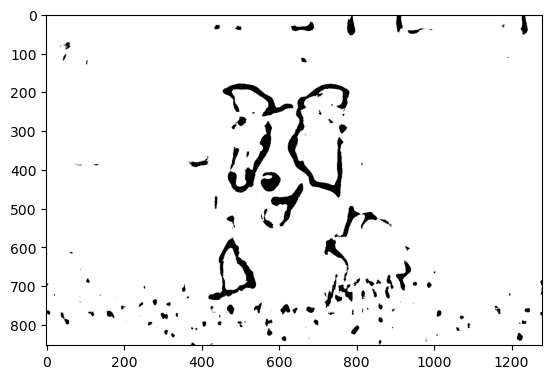

In [113]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = "image_test/chien.jpeg"
pil_image = Image.open(image_path).convert('L')

img = np.array(pil_image)

img_blurred = cv2.medianBlur(img, 21)
img_thresh = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 10)

pil_image_processed = Image.fromarray(img_thresh)

plt.imshow(pil_image_processed, cmap='gray')
plt.show()


In [71]:
## kernel

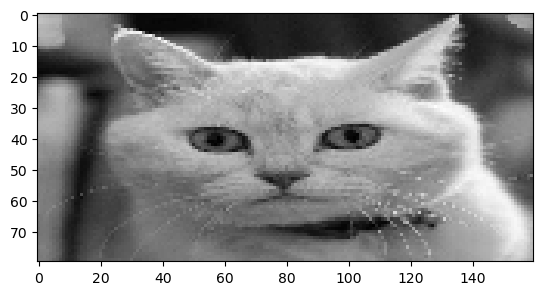

In [218]:
image_path = "cat_dataset_1/images.cv_yfaip1vvxytk4pzkv6rhb/data/train/animal animal_faces cat cat_face/0AM9O53MDBX5.jpg"

image = cv2.imread(image_path, 0)
image = cv2.resize(image, (160, 80))
plt.imshow(image, cmap='gray')

In [222]:
filters = {
    '|': np.array([[-1, 1, -1],
                   [-1, 1, -1],
                   [-1, 1, -1]]),
    '-': np.array([[-1, -1, -1],
                   [1, 1, 1],
                   [-1, -1, -1]]),
    '"': np.array([[1, 1, 1],
                   [-1, -1, -1],
                   [-1, -1, -1]]),
    '_': np.array([[-1, -1, -1],
                   [-1, -1, -1],
                   [1, 1, 1]]),
    '/': np.array([[-1, -1, 1],
                   [-1, 1, -1],
                   [1, -1, -1]]),
    '\\': np.array([[1, -1, -1],
                    [-1, 1, -1],
                    [-1, -1, 1]]),
    '^': np.array([[-1, 1, -1],
                   [1, -1, 1],
                   [-1, -1, -1]]),
    '>': np.array([[-1, 1, -1],
                   [-1, -1, 1],
                   [-1, 1, -1]]),
    '<': np.array([[-1, 1, -1],
                   [1, -1, -1],
                   [-1, 1, -1]]),
    '+': np.array([[-1, 1, -1],
                   [1, 1, 1],
                   [-1, 1, -1]]),
    'X': np.array([[1, -1, 1],
                   [-1, 1, -1],
                   [1, -1, 1]]),
    'o': np.array([[-1, 1, -1],
                   [1, -1, 1],
                   [-1, 1, -1]]),
    'O': np.array([[1, 1, 1],
                   [1, -8, 1],
                   [1, 1, 1]]),
    'L': np.array([[1, -1, -1],
                   [1, -1, -1],
                   [1, 1, 1]]),
    'J': np.array([[-1, -1, 1],
                   [-1, -1, 1],
                   [1, 1, 1]]),
    'T': np.array([[1, 1, 1],
                   [-1, 1, -1],
                   [-1, 1, -1]]),
    'U': np.array([[1, -3.5, 1],
                   [1, -3.5, 1],
                   [1, 1, 1]]),
    '7': np.array([[1, 1, 1],
                   [-1, -1, 1],
                   [-1, -1, 1]]),
    'Z': np.array([[1, 1, -1],
                   [-1, 1, -1],
                   [-1, 1, 1]]),
    'S': np.array([[-1, 1, 1],
                   [-1, 1, -1],
                   [1, 1, -1]]),
    ' ': np.array([[-1, -1, -1],
                   [-1, -1, -1],
                   [-1, -1, -1]]),
    'V': np.array([[1, -1, 1],
                   [1, -1, 1],
                   [-1, 1, -1]]),
    'A': np.array([[-2, 1, -2],
                   [1, -2, 1],
                   [1, 1, 1]]),
    'H': np.array([[1, -3.5, 1],
                   [1, 1, 1],
                   [1, -3.5, 1]]),
    'K': np.array([[1, -2, 1],
                   [1, 1, -2],
                   [1, -2, 1]]),
    'C': np.array([[1, 1, -1.25],
                   [1, -1.25, -1.25],
                   [1, 1, -1.25]]),
    'Y': np.array([[1, -1, 1],
                   [-1, 1, -1],
                   [-1, 1, -1]])
}

In [223]:
height, width = image.shape

padding = 1
border_color = [0, 0, 0]
padded_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=border_color)

filters_result = []

for filter in filters.values():
    filtered_image = cv2.filter2D(padded_image, -1, filter)
    filters_result.append(filtered_image)

filters_result = np.array(filters_result)

max_indices = np.argmax(filters_result, axis=0)

ascii_image = np.empty((height, width), dtype=str)

filter_chars = list(filters.keys())
for i in range(height):
    for j in range(width):
        ascii_image[i, j] = filter_chars[max_indices[i, j]]

for row in ascii_image:
    print("".join(row))

XOXXXXXXXXXXXXOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOXOOOOOOOOOOOOOOOOOOOXXXXX
O+++++++++++++L+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJJ+LAAAAAAAAAAAAAAJJ++++++
X+LLLLLLLLLLLLLXL7TVT+LLLLLLLLLLLLLJ+V+++H++V7T77T777T7T77T777T7777JJ7T77VX7TLTLVSLX7777ZXS77+ZVXLLLLLLLLX+LVJ7+777V777JZ7J+L+LLLLLLLOJJ+OV77777777777T77JJJLLLL
X+LLLL++LLLLLLL+LLSTTLTLLLLLLLLLLLXJ+S7T77TOTOTJTTT7777T77T777+V7JJJJJTJJXLJSLSL7+L+X+7+X7+X+X+JZLLLLLLLLJTL7777777S777+77JZLJLLLLLJJJJ++OL777777777777777++L++L
X++V+T7TLLTLLLLLTLLSLLSLLLLLLLLLLLLJSLOZLJ+++JJXTTZOJJ7TLJ77J777J77777ZVS+VJ+J+L7TLZOS7T77ZJS+7JJ+L+X+L+LVSLT777777ZJJ777JT++7ZLJJLLJJJ+LOLJT7777777777777T7VLT+
X+TTTTTTLLVTV7TX+L+LLLLLL+HLOO_OLLHT+ZV+XJST+X+LLL+X+JJZLJJJJJJJT777S7ZJS7T777+LJSL+X+77777T77JJ+TLLLLLLLXLLXJJJT777JJJJJJSXJJJJLJJJJJ+T+LLLSS7T777777T77T7TT7+T
X+TTLLLLLLXTT7TVT7ZLXLLLLJOJLLLL__

In [221]:
a = np.array([[1, 1, -1.2],
                   [1, -1.2, -1.2],
                   [1, 1, -1.2]])

np.sum(a)

0.20000000000000018